# Linear Regression

## Problem statement

Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

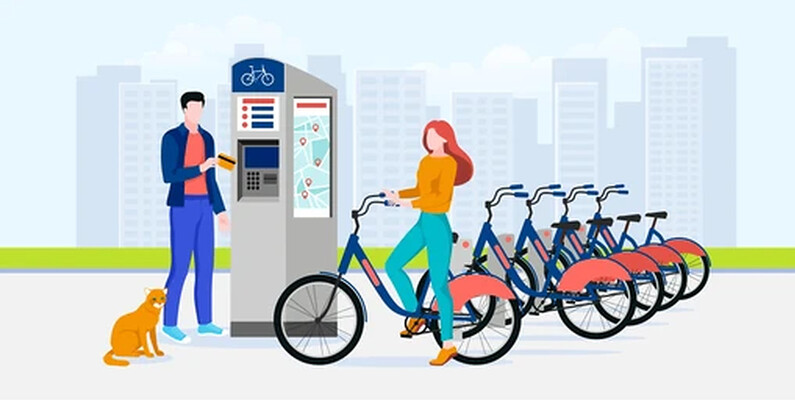

## Importing Libraries

In [1]:
from matplotlib.dates import TU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [5]:
df['dteday']=pd.to_datetime(df['dteday'],format='%d-%m-%Y')
df['day']=pd.DatetimeIndex(df['dteday'],).day

df=df.drop('dteday',axis=1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


## EDA

In [6]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 16
the numerical features: ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'day']


In [7]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("number of discrete Variables Count: ",len(discrete_feature))
print("the discrete features:",discrete_feature)

number of discrete Variables Count:  7
the discrete features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


### Univariate Ananlysis

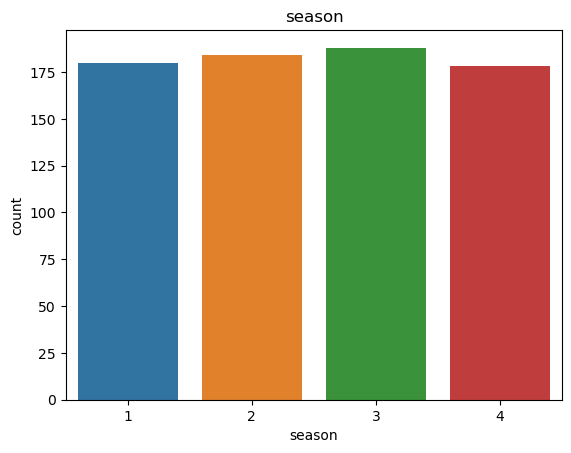

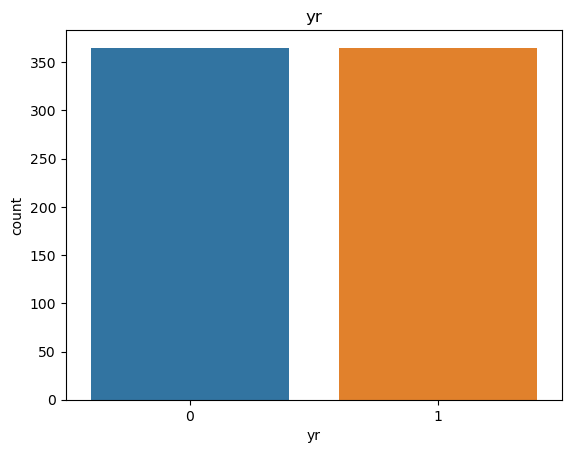

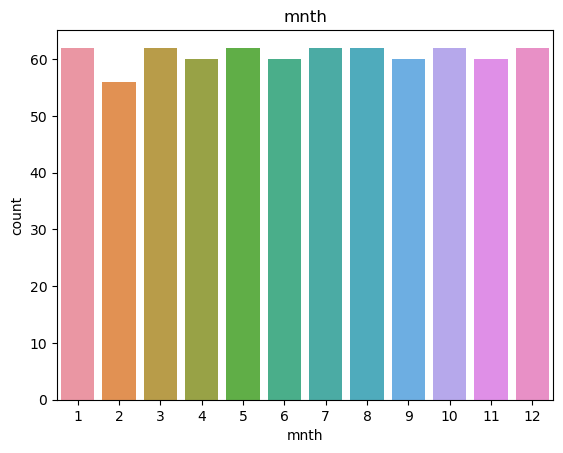

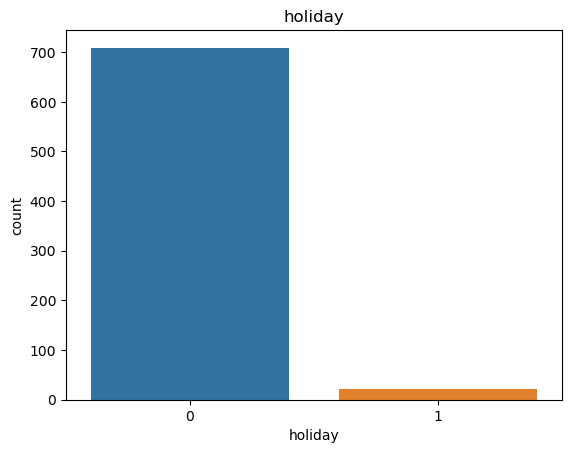

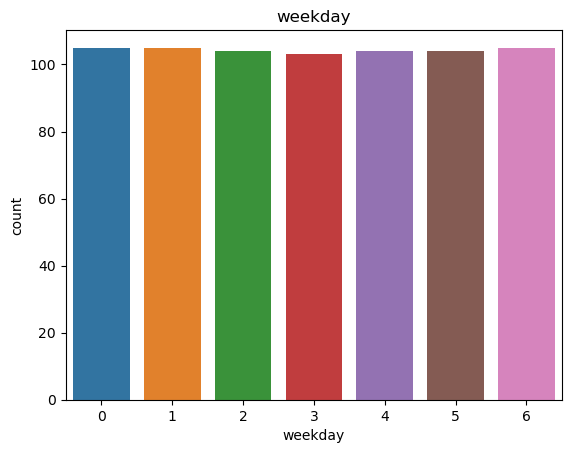

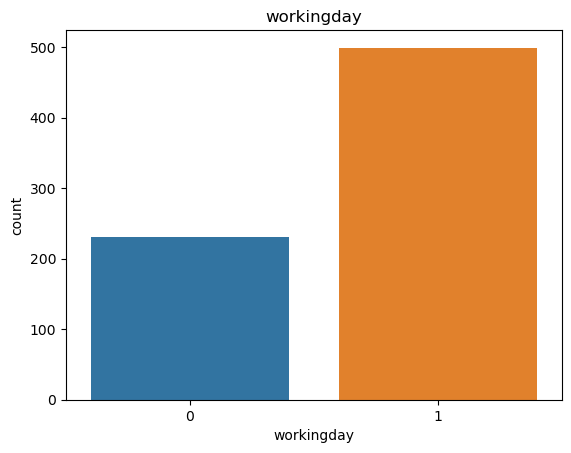

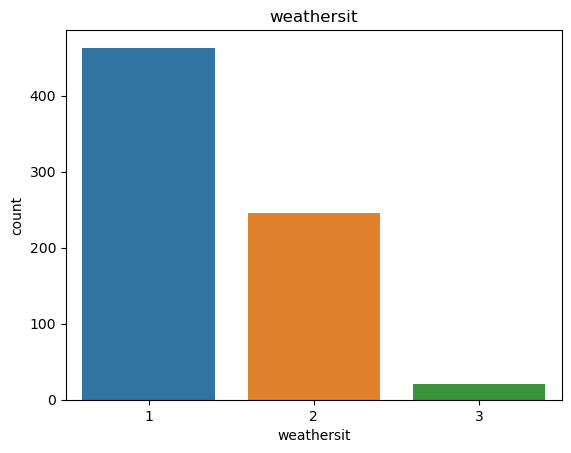

In [8]:
for feature in discrete_feature:
    # data=df.copy()
    sns.countplot(data=df,x=df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the count plots of all the discrete feature. 

In [9]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count: ",len(continuous_feature))
print("the Continuous features:",continuous_feature)

Continuous feature Count:  9
the Continuous features: ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'day']


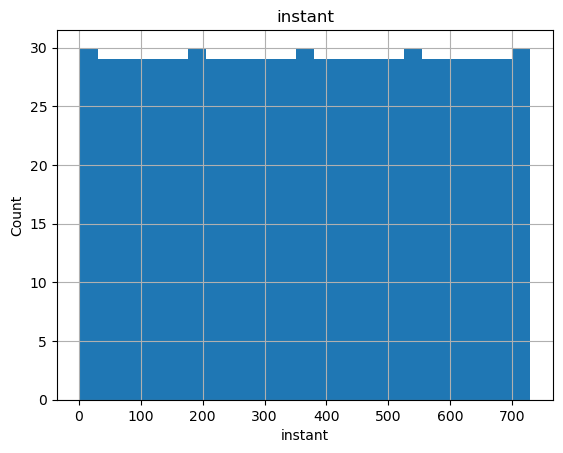

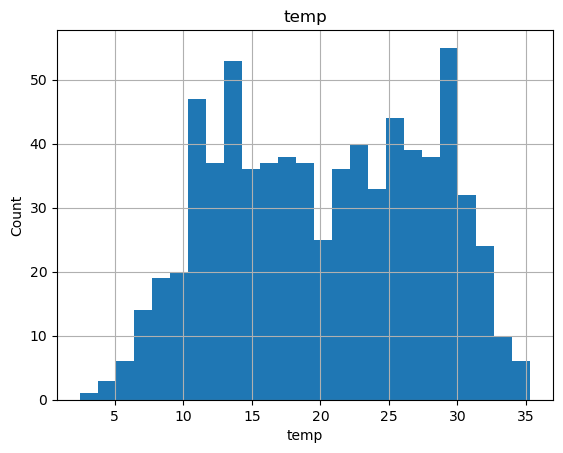

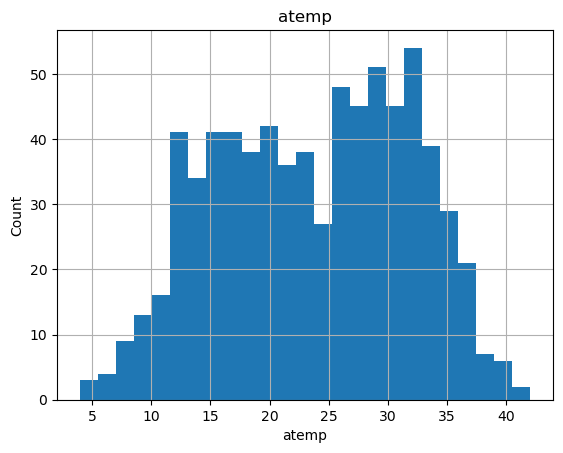

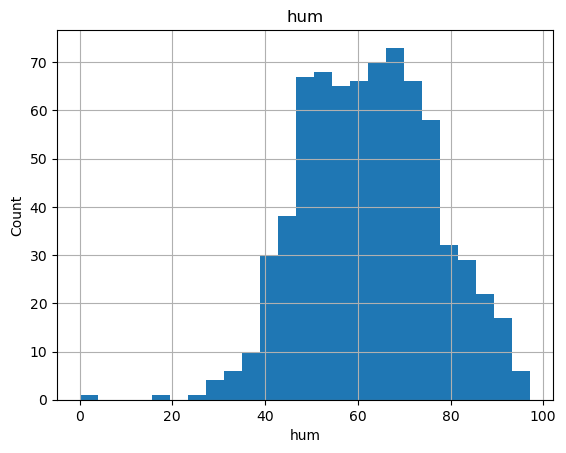

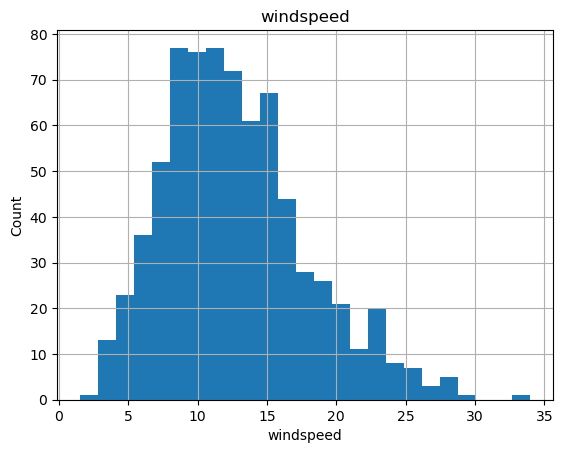

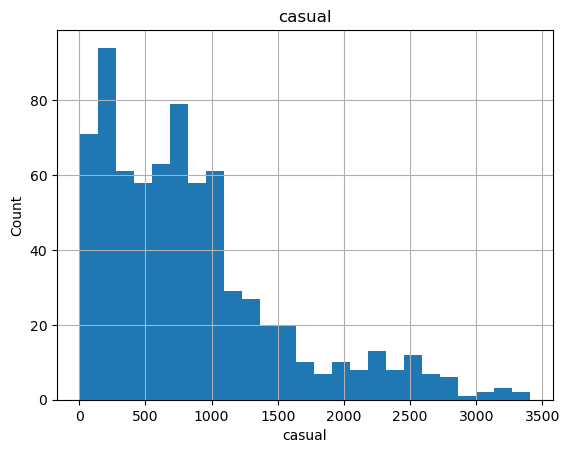

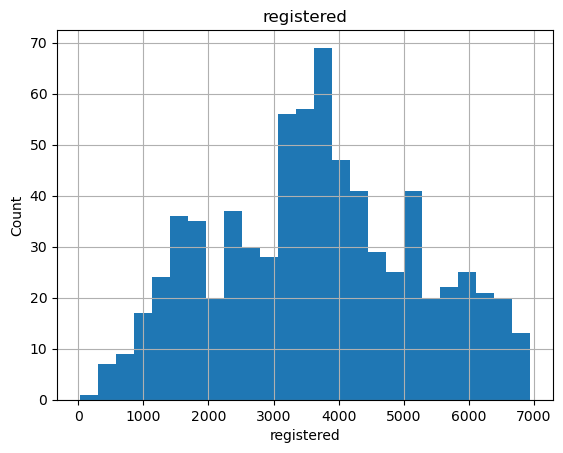

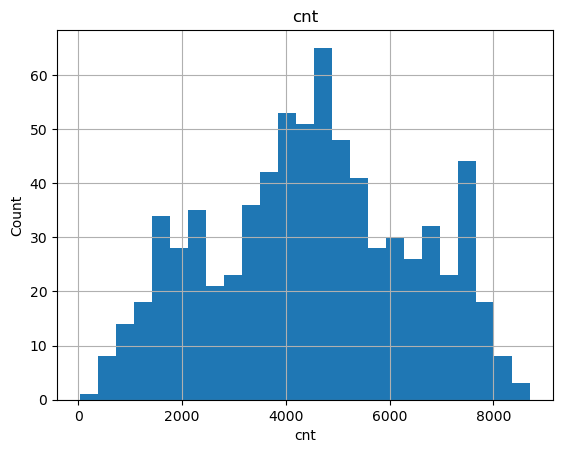

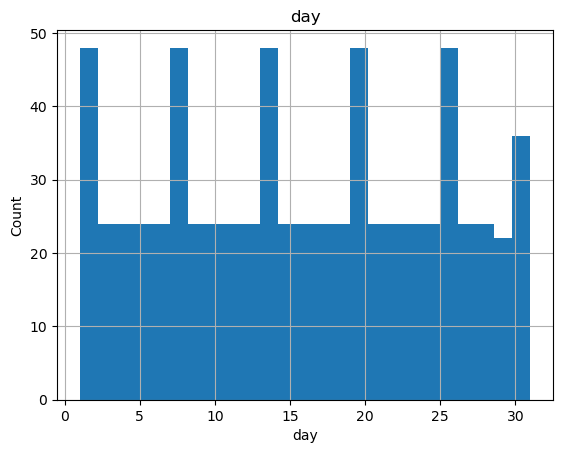

In [10]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    # sns.histplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the histogram plots of all the continuous feature with the data distribution. 

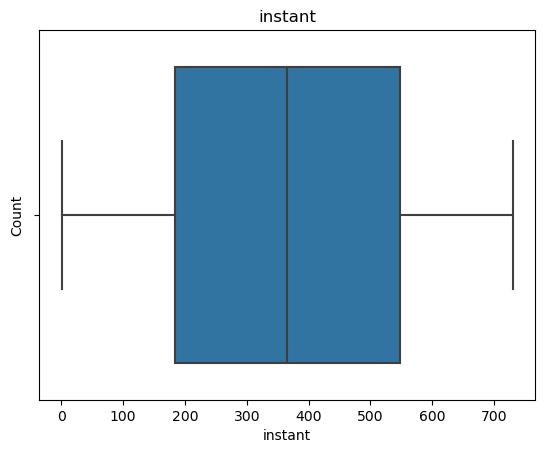

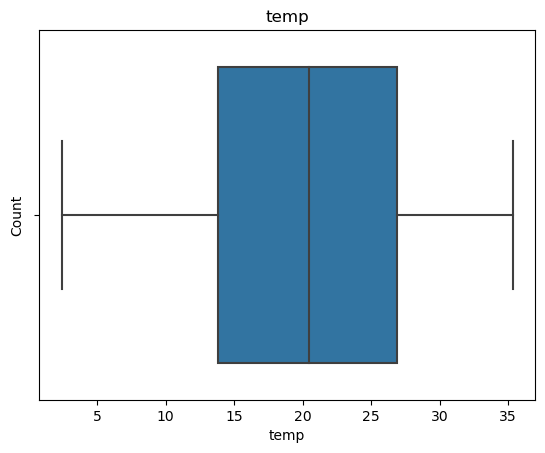

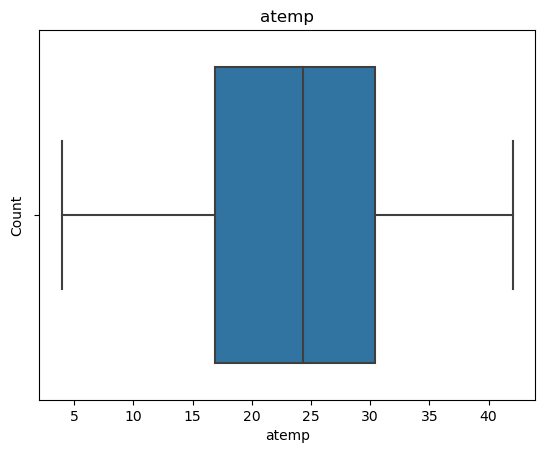

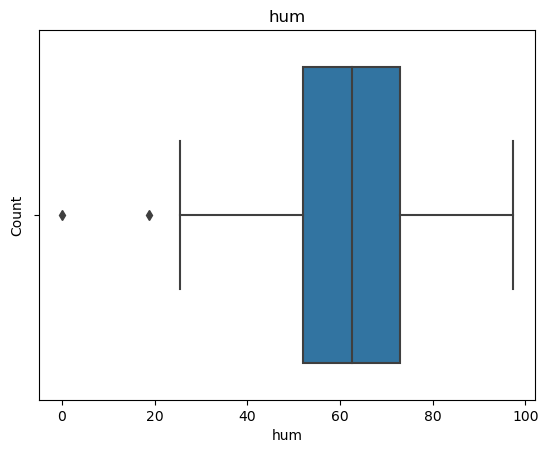

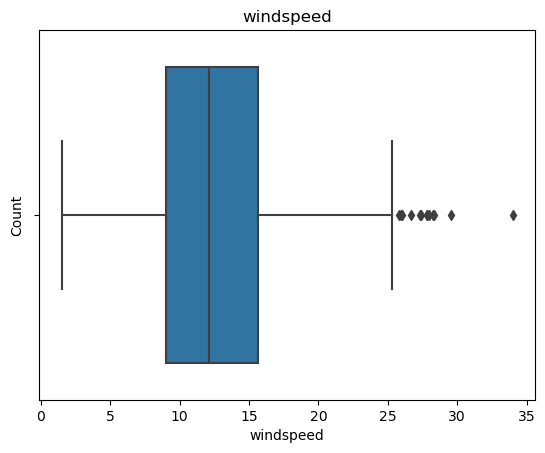

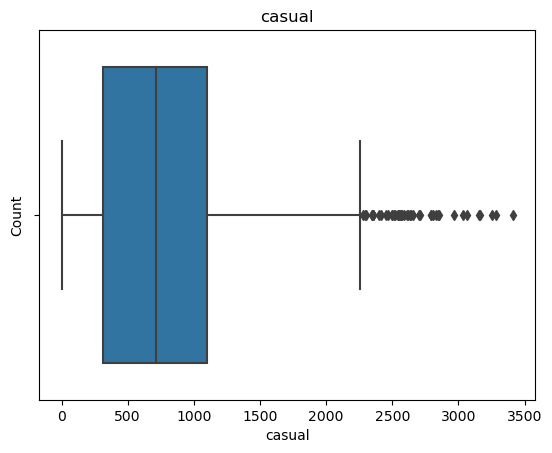

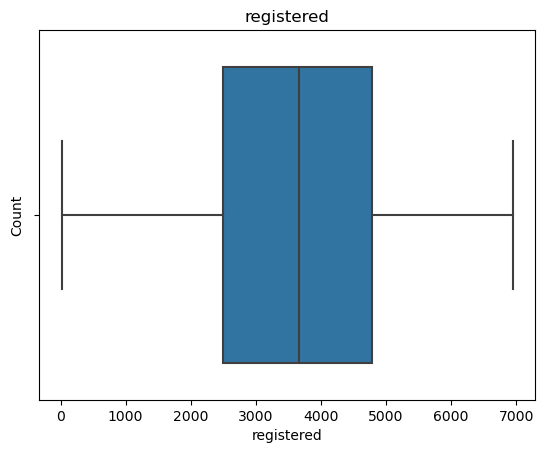

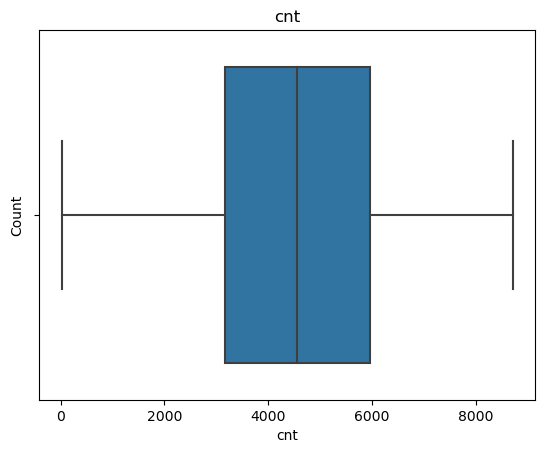

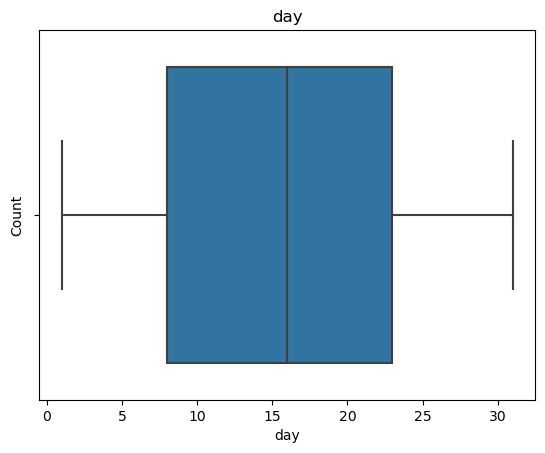

In [11]:
for feature in continuous_feature:
#     data=df.copy()
    sns.boxplot(data=df,x=data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the box plots of all the continuou features. 

### Bivariate Ananlysis

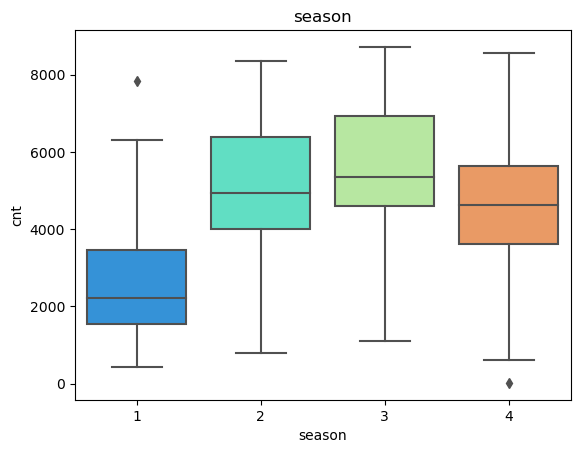

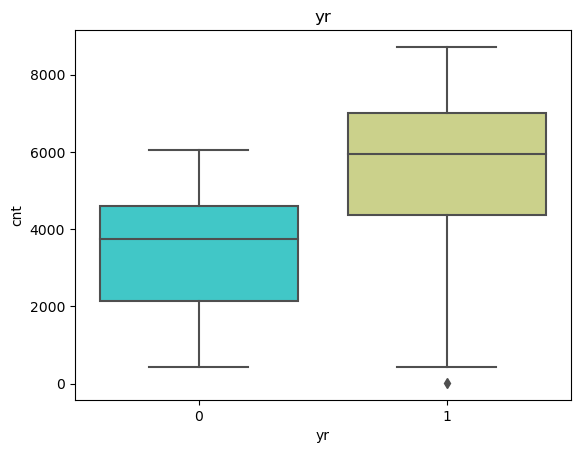

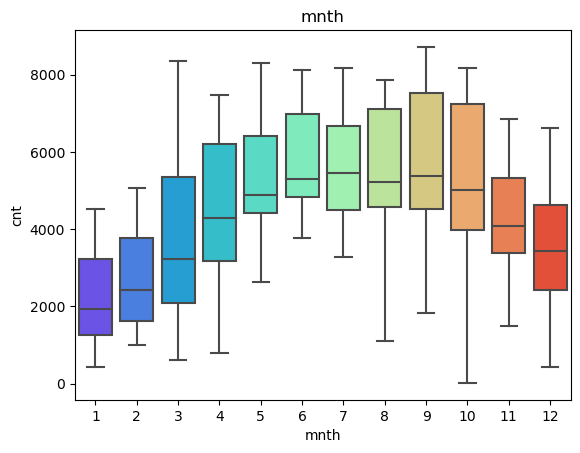

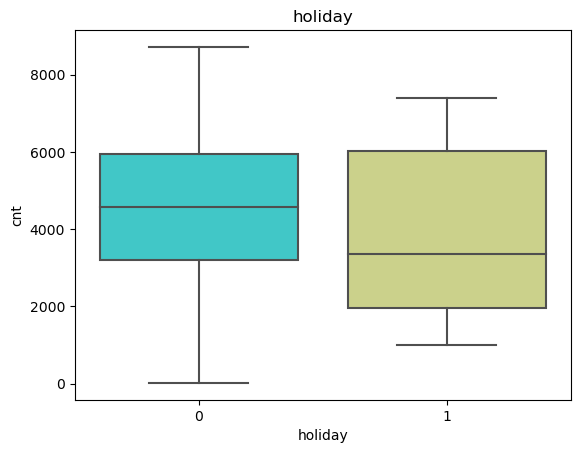

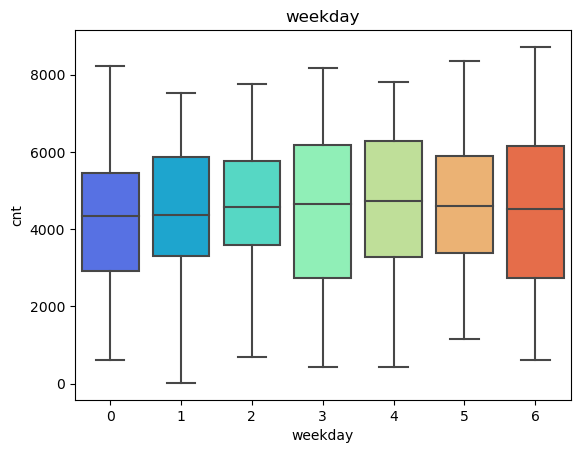

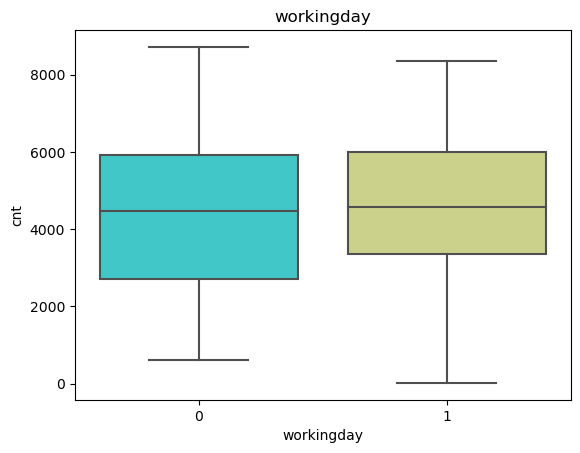

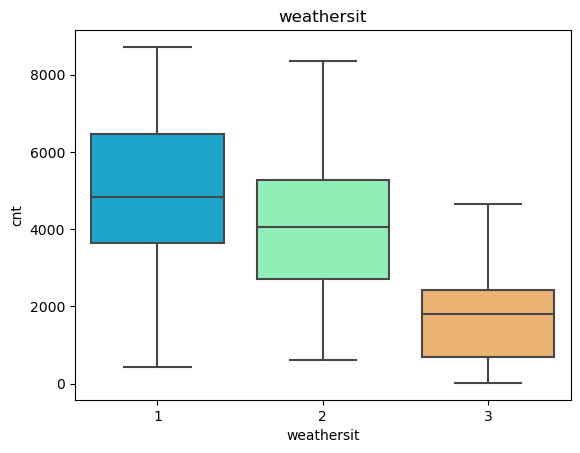

In [12]:
for feature in discrete_feature:
    # data=df.copy()
    sns.boxplot(data=df,x=df[feature], y = "cnt",palette = "rainbow")
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.title(feature)
    plt.show()

#### Key Takeaways:
We can observe the above graphs shows the box plots of all the discrete features with respect to cnt. 

## Data Cleaning

In [13]:
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df['season'] = df['season'].map(season_mapping)
df = pd.get_dummies(df, columns=['season'],dtype=int,drop_first=True)
df = pd.get_dummies(df, columns=['mnth'],dtype=int,drop_first=True)
df = pd.get_dummies(df, columns=['weekday'],dtype=int,drop_first=True)
# df=df.drop(['season'],axis=1)
df.head()
# y=df.pop('cnt')
# X=df

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,1,0,0,0,0,0
3,4,0,0,1,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,1,1,9.305237,11.46350,43.6957,12.522300,82,...,0,0,0,0,0,0,1,0,0,0


In [14]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))

number of numerical_features: 33


In [15]:
print("the numerical features:",numerical_features)

the numerical features: ['instant', 'yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'day', 'season_spring', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']


In [16]:
print(df.corr())

                instant            yr   holiday  workingday  weathersit  \
instant        1.000000  8.660262e-01  0.016275   -0.004619   -0.021862   
yr             0.866026  1.000000e+00  0.008195   -0.002945   -0.050322   
holiday        0.016275  8.195345e-03  1.000000   -0.252948   -0.034395   
workingday    -0.004619 -2.945396e-03 -0.252948    1.000000    0.060236   
weathersit    -0.021862 -5.032247e-02 -0.034395    0.060236    1.000000   
temp           0.150738  4.878919e-02 -0.028764    0.053470   -0.119503   
atemp          0.152773  4.721519e-02 -0.032703    0.052940   -0.120559   
hum            0.016080 -1.125471e-01 -0.015662    0.023202    0.590277   
windspeed     -0.112667 -1.162435e-02  0.006257   -0.018666    0.039769   
casual         0.275604  2.505017e-01  0.054055   -0.517607   -0.246044   
registered     0.660544  5.969106e-01 -0.109142    0.305437   -0.259025   
cnt            0.629896  5.697285e-01 -0.068764    0.062542   -0.295929   
day            0.047565 -

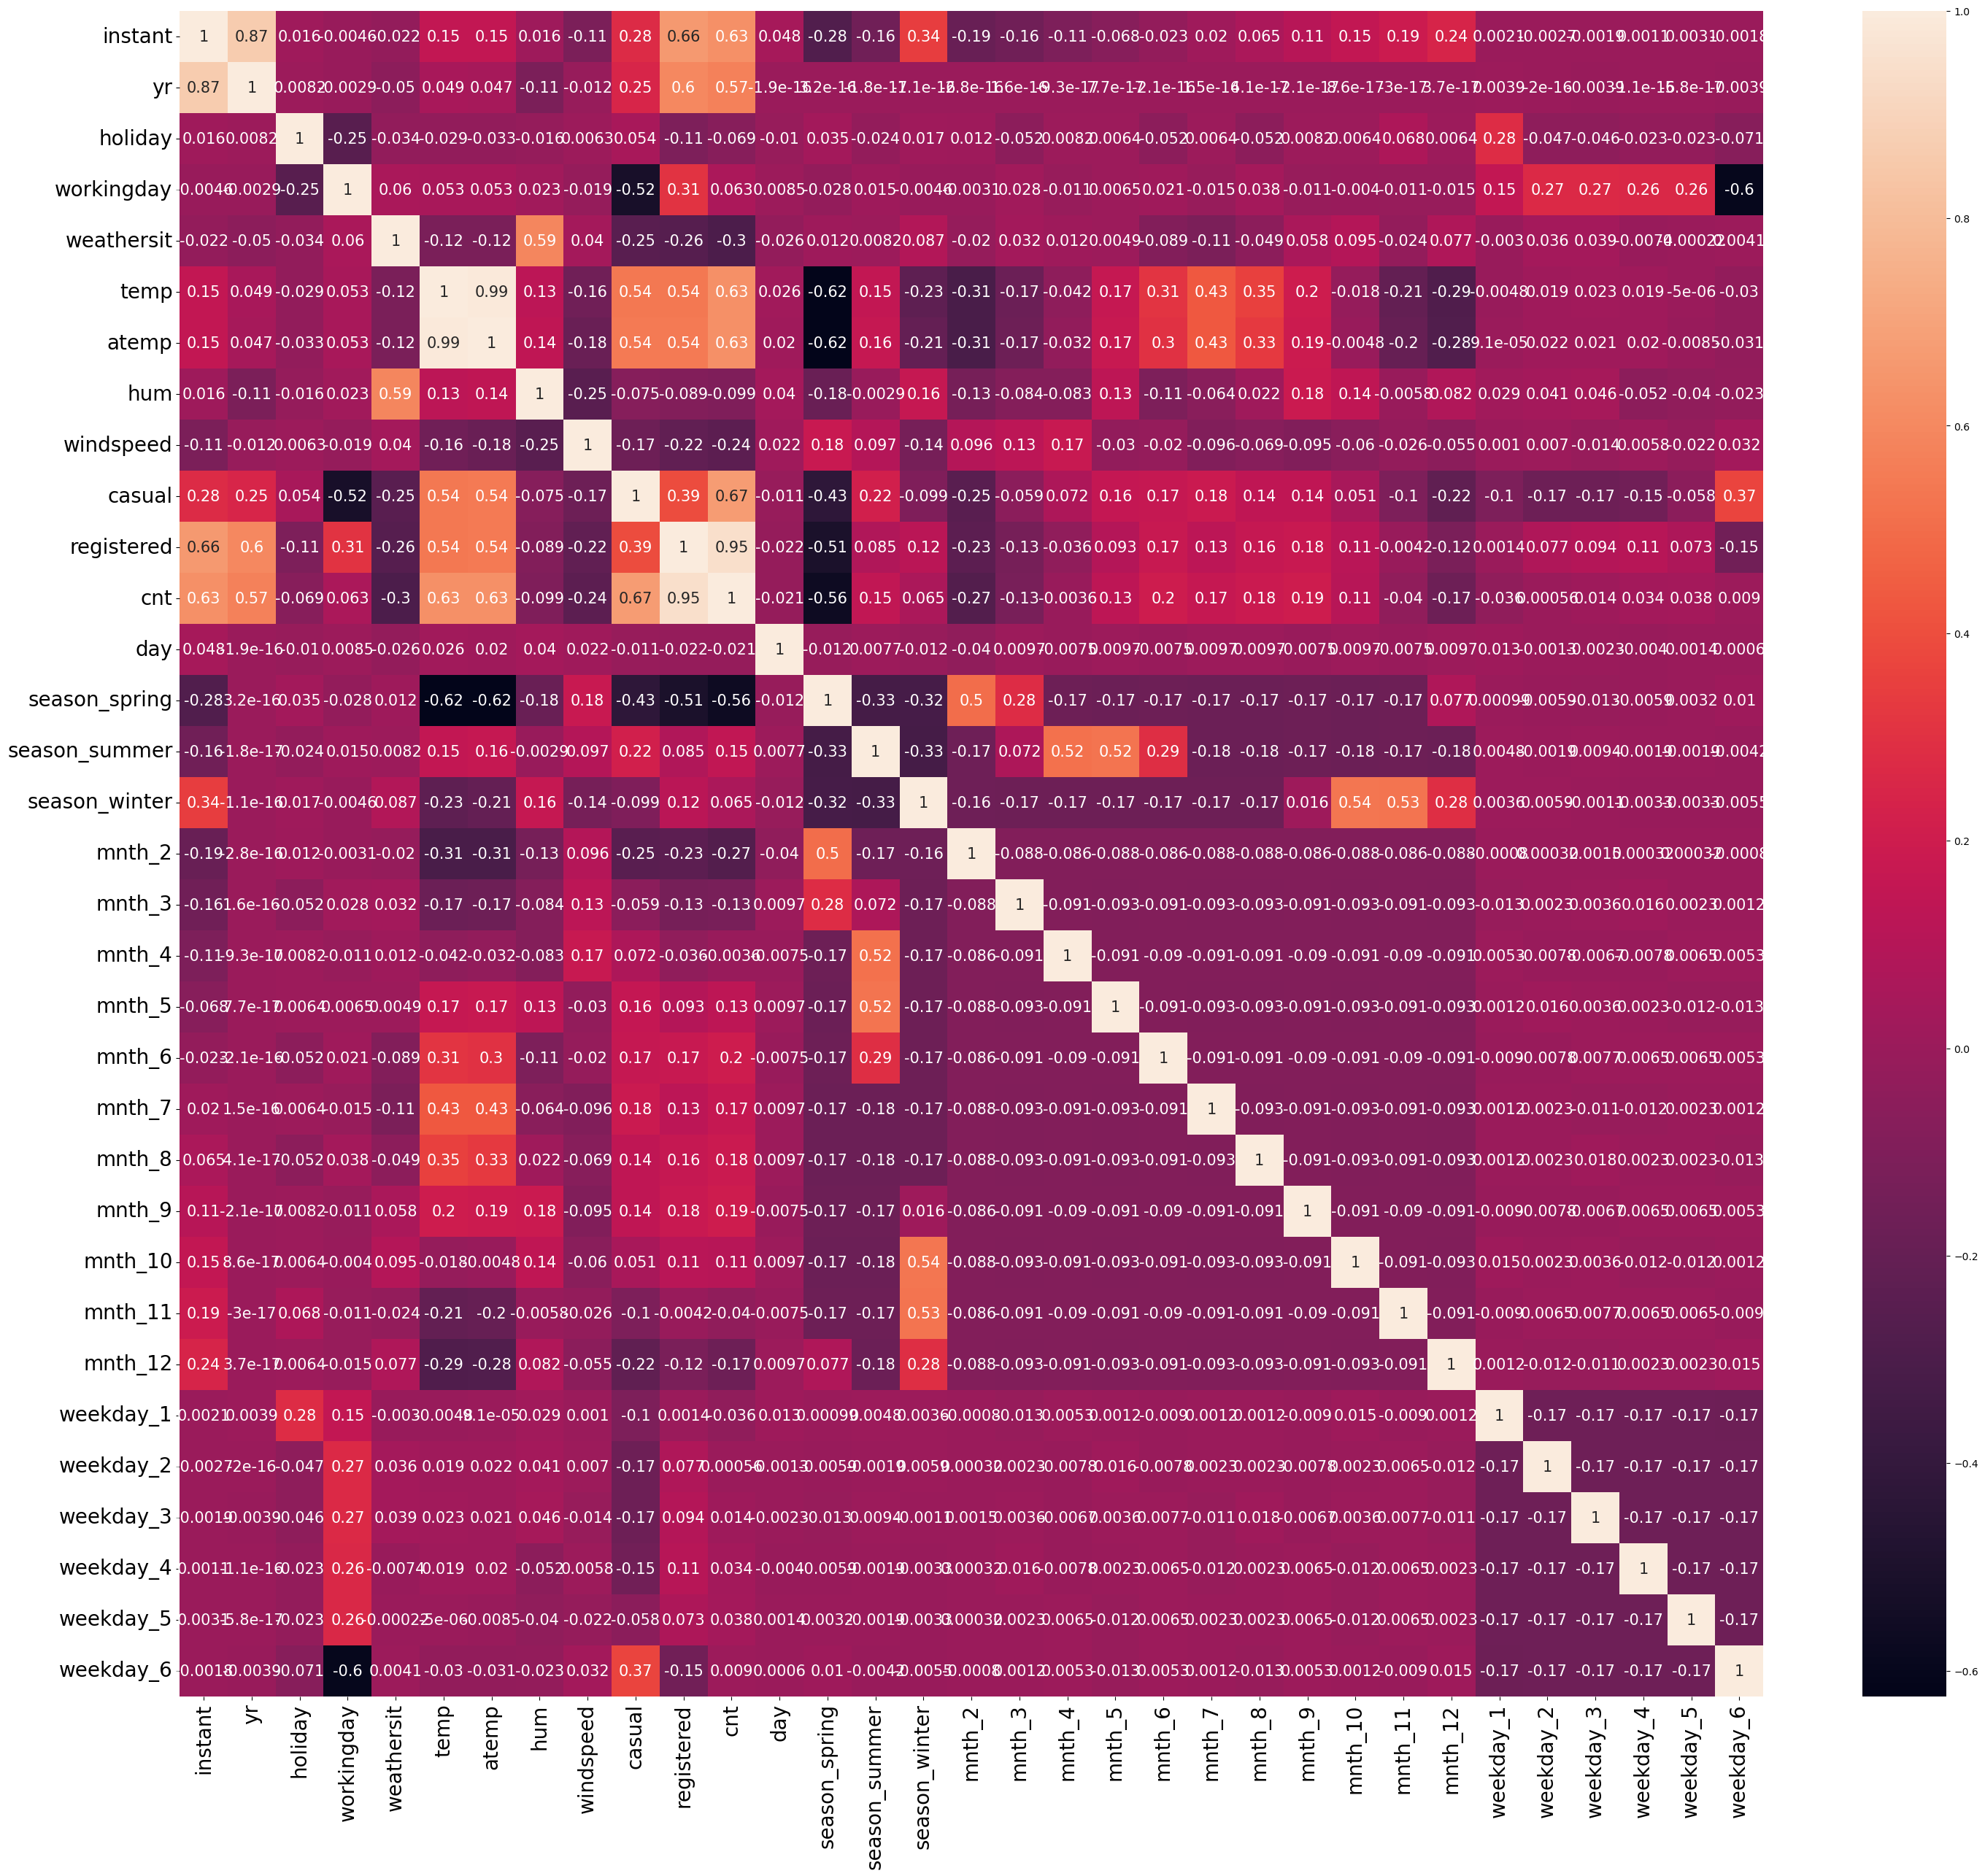

In [17]:
# plt.figure(figsize=(50,40))
# sns.pairplot(df)
# plt.savefig("pairplot.jpg")

plt.figure(figsize=(35,30))
sns.heatmap(df.corr(numeric_only=True), annot=True,annot_kws={'size': 15})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
# plt.savefig("heatmap.jpg")

#### Key Takeaways:
From the above heatmap we can obsereve that the columns 'instant', 'yr','temp','atemp','casual','registered', has positive correlation with the target column and 'holiday', 'windspeed', 'season_spring'  has negative correlation with the target column.

### Train Test Split

In [18]:
df_train,df_test=train_test_split(df, test_size=0.3,random_state=27)

### Scaling

In [19]:
scale=MinMaxScaler()
df_train[numerical_features]=scale.fit_transform(df_train[numerical_features])
df_test[numerical_features]=scale.transform(df_test[numerical_features])
df_train.head()

,instant,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,...,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
210,0.288066,0.0,0.0,0.0,0.0,0.924851,0.891830,0.480034,0.271376,0.455748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
282,0.386831,0.0,1.0,0.0,0.0,0.619897,0.628951,0.756118,0.000000,0.442517,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
204,0.279835,0.0,0.0,0.0,0.0,0.958613,0.985718,0.567625,0.272739,0.306086,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.698217,1.0,0.0,1.0,0.0,0.762572,0.748774,0.769858,0.211209,0.413996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
412,0.565158,1.0,0.0,1.0,0.0,0.322568,0.358022,0.653928,0.351583,0.099971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
y_train=df_train.pop('cnt')
x_train=df_train
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)

x_train shape:  (511, 32)
y_train shape:  (511,)


### REF

In [21]:
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(estimator=lm, n_features_to_select=15)

In [22]:
rfe=rfe.fit(x_train,y_train)
rfe_rank=list(zip(x_train.columns,rfe.support_,rfe.ranking_))
for i in rfe_rank:
    print(i)

('instant', True, 1)
('yr', False, 2)
('holiday', True, 1)
('workingday', False, 3)
('weathersit', False, 6)
('temp', True, 1)
('atemp', True, 1)
('hum', True, 1)
('windspeed', True, 1)
('casual', True, 1)
('registered', True, 1)
('day', False, 16)
('season_spring', False, 11)
('season_summer', True, 1)
('season_winter', True, 1)
('mnth_2', False, 7)
('mnth_3', True, 1)
('mnth_4', False, 14)
('mnth_5', False, 15)
('mnth_6', True, 1)
('mnth_7', False, 10)
('mnth_8', True, 1)
('mnth_9', True, 1)
('mnth_10', True, 1)
('mnth_11', False, 5)
('mnth_12', False, 4)
('weekday_1', False, 17)
('weekday_2', False, 18)
('weekday_3', False, 8)
('weekday_4', False, 12)
('weekday_5', False, 13)
('weekday_6', False, 9)


### Model Traing

In [23]:
col=x_train.columns[rfe.support_]

x_train_rfe=x_train[col]

x_train_lm=sm.add_constant(x_train_rfe)

lr=sm.OLS(y_train,x_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.727e+31
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:33:53   Log-Likelihood:                 17602.
No. Observations:                 511   AIC:                        -3.517e+04
Df Residuals:                     495   BIC:                        -3.510e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008   8.38e-17  -8.99e+12

### Residuals

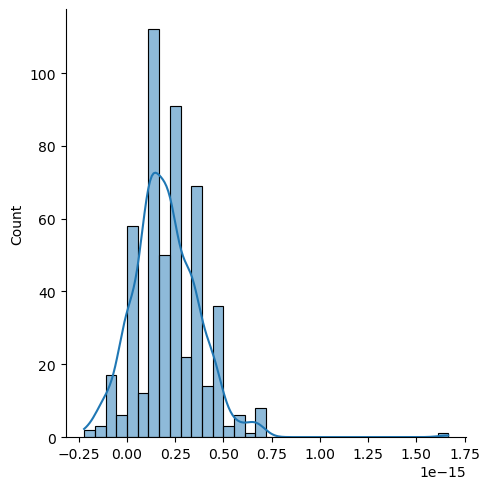

In [24]:
y_train_pred=lr.predict(x_train_lm)

res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.show()
# plt.savefig("res.jpg")

#### Key Takeaways:
From the above distplot we can observe that the residuals are not normaly distributed.

In [25]:
y_test=df_test.pop('cnt')
x_test=df_test[col]
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_test shape:  (219, 15)
y_test shape:  (219,)


### R square

In [26]:
x_test_lm=sm.add_constant(x_test)
y_test_pred=lr.predict(x_test_lm)

r2_val = r2_score(y_test, y_test_pred)
print('R square value: ',r2_val)

R square value:  1.0


### VIF

In [27]:
X=x_train_lm
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

         Variable    VIF
3            temp  57.35
4           atemp  54.27
0           const  49.31
8      registered   3.73
1         instant   2.80
10  season_winter   2.19
7          casual   1.89
9   season_summer   1.74
15        mnth_10   1.55
13         mnth_8   1.52
5             hum   1.51
6       windspeed   1.36
14         mnth_9   1.34
12         mnth_6   1.31
11         mnth_3   1.14
2         holiday   1.07


### Model Training:
#### Exprement 2

In [28]:
x_train_lm_new=df_train[['holiday','temp','windspeed','casual','registered','season_spring']]
x_train_lm_new=sm.add_constant(x_train_lm_new)
lr=sm.OLS(y_train,x_train_lm_new).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.615e+31
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:33:54   Log-Likelihood:                 17435.
No. Observations:                 511   AIC:                        -3.486e+04
Df Residuals:                     504   BIC:                        -3.483e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008   7.28e-17  -1.03e+13

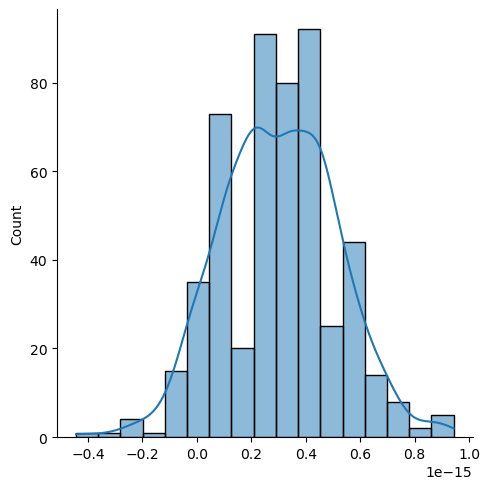

In [29]:
y_train_pred=lr.predict(x_train_lm_new)

res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.show()
# plt.savefig("res2.jpg")

#### Key Takeaways:
From the above distplot we can observe that the residuals are not normaly distributed.

In [30]:
# y_test=df_test.pop('cnt')
# x_test=df_test[col]
x_test_new=df_test[['holiday','temp','windspeed','casual','registered','season_spring']]
x_test_new=sm.add_constant(x_test_new)
print('x_test shape: ',x_test_new.shape)
print('y_test shape: ',y_test.shape)

x_test shape:  (219, 7)
y_test shape:  (219,)


In [31]:
# x_test_lm=sm.add_constant(x_test_new)
y_test_pred=lr.predict(x_test_new)

r2_val = r2_score(y_test, y_test_pred)
print('R square value: ',r2_val)

R square value:  1.0


In [32]:
X=x_train_lm_new
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

        Variable    VIF
0          const  19.75
2           temp   2.04
6  season_spring   1.66
5     registered   1.55
4         casual   1.48
3      windspeed   1.08
1        holiday   1.02


### Model Training:
#### Exprement 3

In [33]:
x_train_lm_new=df_train[['temp','windspeed','casual','registered','season_spring']]
x_train_lm_new=sm.add_constant(x_train_lm_new)
lr=sm.OLS(y_train,x_train_lm_new).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.734e+32
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:33:55   Log-Likelihood:                 17789.
No. Observations:                 511   AIC:                        -3.557e+04
Df Residuals:                     505   BIC:                        -3.554e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008   3.63e-17  -2.07e+13

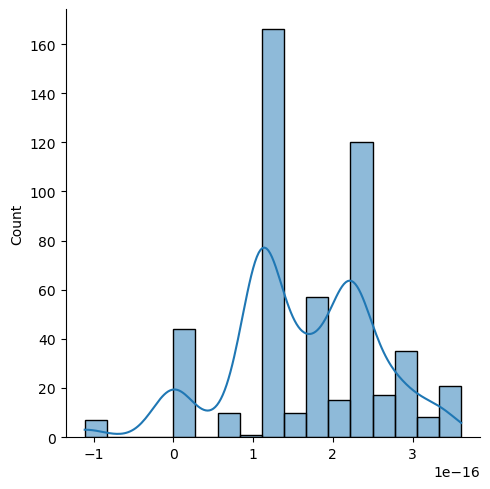

In [34]:
y_train_pred=lr.predict(x_train_lm_new)

res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.show()
# plt.savefig("res3.jpg")

#### Key Takeaways:
From the above distplot we can observe that the residuals are not normaly distributed.

In [35]:
# y_test=df_test.pop('cnt')
# x_test=df_test[col]
x_test_new=df_test[['temp','windspeed','casual','registered','season_spring']]
x_test_new=sm.add_constant(x_test_new)
print('x_test shape: ',x_test_new.shape)
print('y_test shape: ',y_test.shape)

x_test shape:  (219, 6)
y_test shape:  (219,)


In [36]:
# x_test_lm=sm.add_constant(x_test_new)
y_test_pred=lr.predict(x_test_new)

r2_val = r2_score(y_test, y_test_pred)
print('R square value: ',r2_val)

R square value:  1.0


In [37]:
X=x_train_lm_new
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

        Variable    VIF
0          const  19.62
1           temp   2.04
5  season_spring   1.66
4     registered   1.54
3         casual   1.46
2      windspeed   1.08


### Model Training:
#### Exprement 4

In [38]:
x_train_lm_new=df_train[['mnth_4','mnth_5','temp','windspeed','casual','registered','season_spring']]
x_train_lm_new=sm.add_constant(x_train_lm_new)
lr=sm.OLS(y_train,x_train_lm_new).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.535e+30
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:33:56   Log-Likelihood:                 16945.
No. Observations:                 511   AIC:                        -3.387e+04
Df Residuals:                     503   BIC:                        -3.384e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008   1.93e-16  -3.91e+12

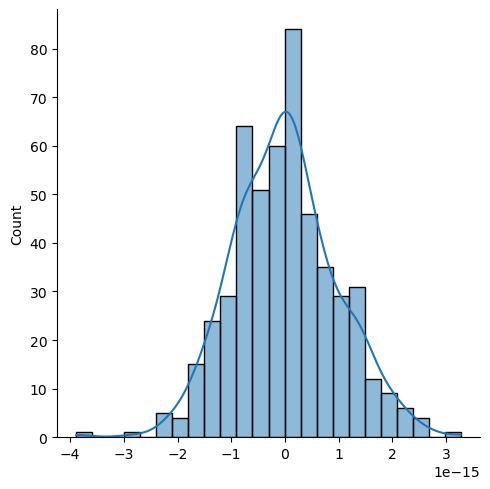

In [39]:
y_train_pred=lr.predict(x_train_lm_new)

res=y_train-y_train_pred
sns.displot(res,kde=True)
plt.show()
# plt.savefig("res4.jpg")

#### Key Takeaways:
From the above distplot we can observe that the residuals are normaly distributed.

In [40]:
# y_test=df_test.pop('cnt')
# x_test=df_test[col]
x_test_new=df_test[['mnth_4','mnth_5','temp','windspeed','casual','registered','season_spring']]
x_test_new=sm.add_constant(x_test_new)
print('x_test shape: ',x_test_new.shape)
print('y_test shape: ',y_test.shape)

x_test shape:  (219, 8)
y_test shape:  (219,)


In [41]:
# x_test_lm=sm.add_constant(x_test_new)
y_test_pred=lr.predict(x_test_new)

r2_val = r2_score(y_test, y_test_pred)
print('R square value: ',r2_val)

R square value:  1.0


In [42]:
X=x_train_lm_new
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

        Variable    VIF
0          const  20.20
3           temp   2.13
7  season_spring   1.83
6     registered   1.55
5         casual   1.53
1         mnth_4   1.20
4      windspeed   1.15
2         mnth_5   1.07


## Conclusion:

The taget column 'cnt' can be explaned by the columns 'mnth_4','mnth_5','temp','windspeed','casual','registered','season_spring' as,

Y('cnt') = (2.082e-16 * 'mnth_4') + (-1.416e-15 * 'mnth_5') + (4.857e-16 * 'temp') + (-2.512e-15 * 'windspeed') + (0.4270 * 'casual') + (0.8163 * 'registered') + (1.658e-15 * 'season_spring') + (-0.0008)